In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Users\abhisv\Desktop\Historical Product Demand.csv")

In [3]:
df=df.sample(10000)

In [4]:
df.shape

(10000, 5)

In [5]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [6]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
559140,Product_1539,Whse_A,Category_019,2014/3/5,0
863807,Product_1195,Whse_C,Category_019,2016/6/20,5000
20273,Product_0831,Whse_J,Category_019,2012/8/29,2000
166411,Product_1825,Whse_J,Category_006,2012/9/18,2500
209064,Product_1341,Whse_S,Category_019,2013/3/7,50000


In [7]:
df.isna().sum()

Product_Code          0
Warehouse             0
Product_Category      0
Date                130
Order_Demand          0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df['Date'].isna().sum()

130

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
df.isna().sum()

Product_Code          0
Warehouse             0
Product_Category      0
Order_Demand          0
Year                130
Month               130
Day                 130
dtype: int64

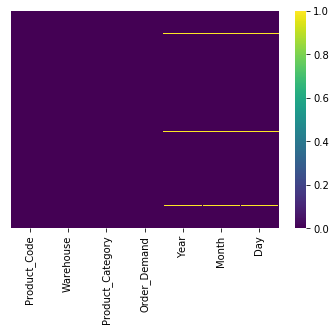

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [14]:
#df['Year'].notnull()==False

In [15]:
df['Year'].fillna(df['Year'].mode(),axis=0,inplace=True)

In [16]:
df.dropna(axis=0,how='any',inplace=True)

In [17]:
df.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Order_Demand        0
Year                0
Month               0
Day                 0
dtype: int64

In [18]:
df.shape

(9870, 7)

In [19]:
# As the null valued rows are removed, in 10k rows, just 114 rows are removed, the information lost is minimum

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9870 entries, 559140 to 138207
Data columns (total 7 columns):
Product_Code        9870 non-null object
Warehouse           9870 non-null object
Product_Category    9870 non-null object
Order_Demand        9870 non-null object
Year                9870 non-null float64
Month               9870 non-null float64
Day                 9870 non-null float64
dtypes: float64(3), object(4)
memory usage: 616.9+ KB


In [21]:
# As per my knowledge as am using linear regression model to forecast, so i will use all the colunms initially.
#Since most of the columns are string, i will trim the string from the data.

In [22]:
df['Product_Code']=df['Product_Code'].map(lambda x:x.lstrip('Product_'))

In [23]:
df['Product_Category'] = df['Product_Category'].map(lambda x: x.lstrip('Category_'))

In [24]:
df['Warehouse'] = df['Warehouse'].map(lambda x: x.lstrip('Whse_'))

In [25]:
df['Order_Demand']=df['Order_Demand'].map(lambda x: x.rstrip(')'))
df['Order_Demand']=df['Order_Demand'].map(lambda x: x.lstrip('('))

In [26]:
df1=pd.get_dummies(df['Warehouse'],drop_first=True)

In [27]:
df=pd.concat([df,df1],axis=1)

In [28]:
df.drop('Warehouse',axis=1,inplace=True)

In [29]:
df.head()

,Product_Code,Product_Category,Order_Demand,Year,Month,Day,C,J,S
559140,1539,019,0,2014.0,3.0,5.0,0,0,0
863807,1195,019,5000,2016.0,6.0,20.0,1,0,0
20273,0831,019,2000,2012.0,8.0,29.0,0,1,0
166411,1825,006,2500,2012.0,9.0,18.0,0,1,0
209064,1341,019,50000,2013.0,3.0,7.0,0,0,1


In [30]:
##lets do EDA (Null value is already treated)

In [31]:
df['Product_Code']=pd.to_numeric(df['Product_Code'])
df['Product_Category']=pd.to_numeric(df['Product_Category'])
df['Order_Demand']=pd.to_numeric(df['Order_Demand'])

In [32]:
## Outlier treatment (Lets check for outlier anamolies)

In [33]:
df.head()

,Product_Code,Product_Category,Order_Demand,Year,Month,Day,C,J,S
559140,1539,19,0,2014.0,3.0,5.0,0,0,0
863807,1195,19,5000,2016.0,6.0,20.0,1,0,0
20273,831,19,2000,2012.0,8.0,29.0,0,1,0
166411,1825,6,2500,2012.0,9.0,18.0,0,1,0
209064,1341,19,50000,2013.0,3.0,7.0,0,0,1


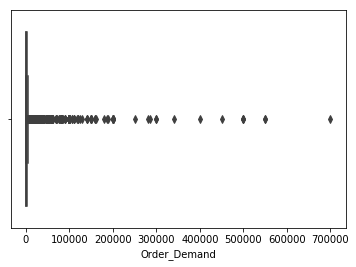

In [34]:
sns.boxplot(df['Order_Demand']) #(We have outliers, lets treat them, i use IQR method)

In [35]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p

In [36]:
outlier_detect(df)

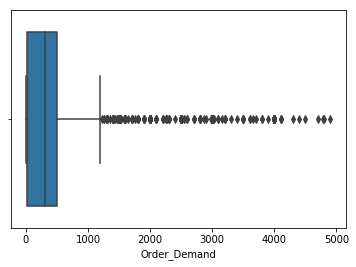

In [37]:
sns.boxplot(df['Order_Demand'])

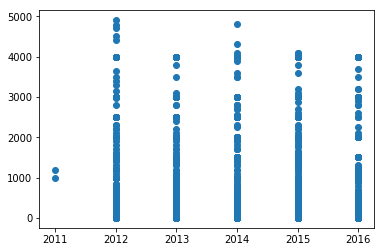

In [38]:
plt.scatter(df['Year'],df['Order_Demand'])# Apart from 2011, rest of the year have constant demand)

In [39]:
#Lets check the distribution of each variables

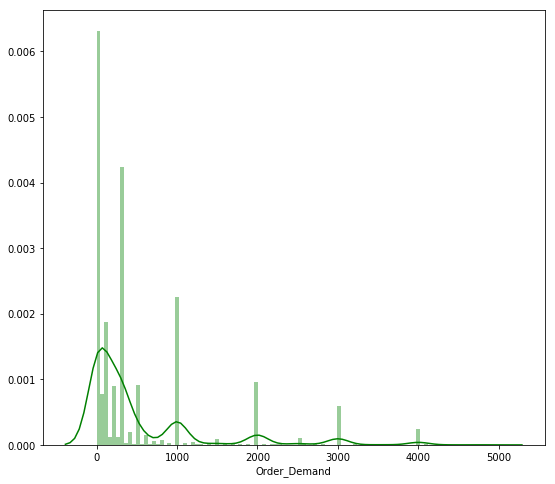

In [40]:
plt.figure(figsize=(9,8))
sns.distplot((df['Order_Demand']),color='g',bins=100) # as we can see order_demand is quite normally distributed.

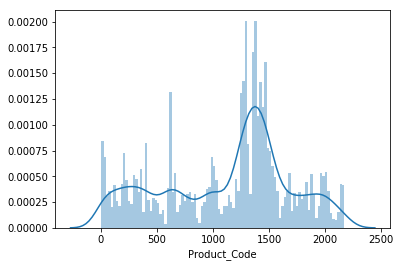

In [41]:
sns.distplot((df['Product_Code']),bins=100)

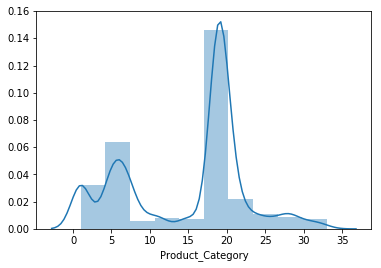

In [42]:
sns.distplot((df['Product_Category']),bins=10)

(array([2.000e+00, 0.000e+00, 1.883e+03, 0.000e+00, 2.077e+03, 0.000e+00,
        2.050e+03, 0.000e+00, 2.135e+03, 1.723e+03]),
 array([2011. , 2011.5, 2012. , 2012.5, 2013. , 2013.5, 2014. , 2014.5,
        2015. , 2015.5, 2016. ]),
 <a list of 10 Patch objects>)

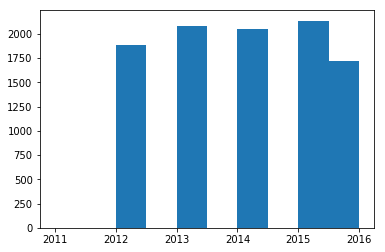

In [43]:
plt.hist(df['Year'])

(array([1597.,  889.,  792.,  799.,  812.,  883.,  794.,  847.,  890.,
        1567.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

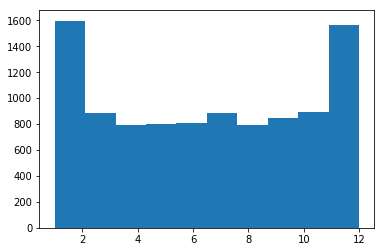

In [44]:
plt.hist(df['Month'])

(array([ 979.,  997., 1015.,  974.,  922.,  970., 1002., 1008.,  991.,
        1012.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

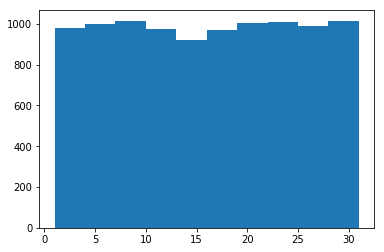

In [45]:
plt.hist(df['Day'])

In [46]:
# As all the variables are almost normally distributed, we can proceed further.

In [47]:
# Now will check the assumptions of Linear regression

In [48]:
#1) Linearity, all features should fallow relation with target variable,  from heatmap will check the correlation between featureas and target

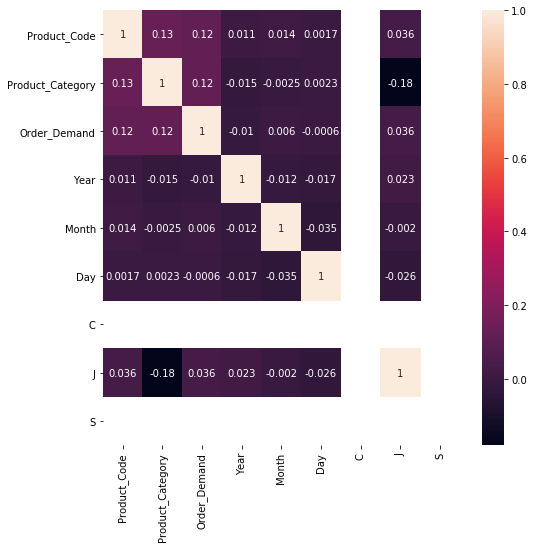

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [50]:
df.corr(method='pearson')

,Product_Code,Product_Category,Order_Demand,Year,Month,Day,C,J,S
Product_Code,1.000000,0.134431,0.118531,0.011371,0.013800,0.001656,NaN,0.035574,NaN
Product_Category,0.134431,1.000000,0.120727,-0.014725,-0.002459,0.002330,NaN,-0.180448,NaN
Order_Demand,0.118531,0.120727,1.000000,-0.010107,0.006046,-0.000602,NaN,0.035822,NaN
Year,0.011371,-0.014725,-0.010107,1.000000,-0.012005,-0.017450,NaN,0.023457,NaN
Month,0.013800,-0.002459,0.006046,-0.012005,1.000000,-0.035325,NaN,-0.002007,NaN
Day,0.001656,0.002330,-0.000602,-0.017450,-0.035325,1.000000,NaN,-0.025551,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,0.035574,-0.180448,0.035822,0.023457,-0.002007,-0.025551,NaN,1.000000,NaN
S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Lets use variables which have positive relation with order_demand

In [52]:
df.cov()

,Product_Code,Product_Category,Order_Demand,Year,Month,Day,C,J,S
Product_Code,326290.326184,607.946382,54909.966250,8.928534,26.969305,8.283007,0.0,8.856346,0.0
Product_Category,607.946382,62.679380,775.142194,-0.160240,-0.066604,0.161507,0.0,-0.622641,0.0
Order_Demand,54909.966250,775.142194,657705.856672,-11.266576,16.773990,-4.273932,0.0,12.661620,0.0
Year,8.928534,-0.160240,-11.266576,1.889424,-0.056456,-0.210004,0.0,0.014052,0.0
Month,26.969305,-0.066604,16.773990,-0.056456,11.704884,-1.058118,0.0,-0.002992,0.0
Day,8.283007,0.161507,-4.273932,-0.210004,-1.058118,76.653705,0.0,-0.097500,0.0
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
J,8.856346,-0.622641,12.661620,0.014052,-0.002992,-0.097500,0.0,0.189952,0.0
S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [53]:
# So lets split x and y

In [54]:
df.drop(['C','S','Month','Day'],axis=1,inplace=True)

In [55]:
df.head()

,Product_Code,Product_Category,Order_Demand,Year,J
559140,1539,19,0.0,2014.0,0
863807,1195,19,300.0,2016.0,0
20273,831,19,2000.0,2012.0,1
166411,1825,6,2500.0,2012.0,1
209064,1341,19,300.0,2013.0,0


In [56]:
df.drop('J',axis=1,inplace=True)

In [57]:
y=df['Order_Demand']

In [58]:
y.shape

(9870,)

In [59]:
x=df[['Product_Code','Product_Category','Year']]

In [60]:
x.shape

(9870, 3)

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_x=ss.fit_transform(x)

In [62]:
x=ss_x

In [63]:
x=pd.DataFrame(x)

In [399]:
x.shape,y.shape

((9905, 3), (9905,))

In [400]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [401]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6933, 3), (2972, 3), (6933,), (2972,))

In [402]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
y_pred=lr.predict(x_test)

In [408]:
from sklearn.metrics import r2_score,accuracy_score

In [409]:
r2_scre=r2_score(y_test,y_pred)

In [410]:
r2_scre

0.035368953556465965

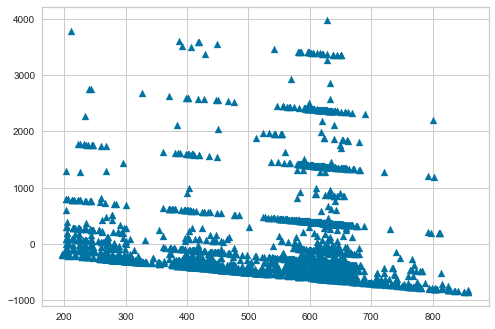

In [411]:
plt.scatter(y_pred,(y_test-y_pred),marker='^')

In [412]:
SSE=sum(y_test-y_pred)**2

In [413]:
SSE

34391209.339696914

In [414]:
from sklearn import metrics

In [415]:
mse=metrics.mean_squared_error(y_test,y_pred)

In [416]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

791.7227836356413

In [417]:
var_test = y_test.var()
var_test

650026.7118493533

In [418]:
Adj_rsquare = 1-(mse/var_test)
Adj_rsquare

0.03569352658689162

In [419]:
from yellowbrick.regressor import ResidualsPlot

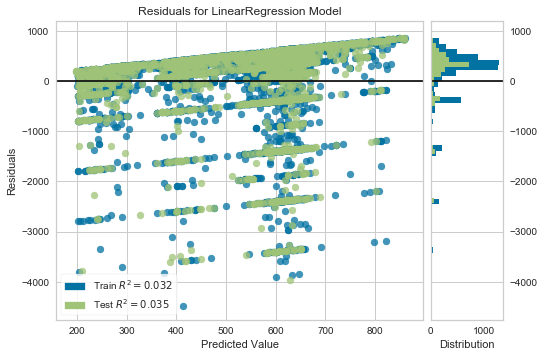

In [420]:
visualizer=ResidualsPlot(lr)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

In [421]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

D:\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [422]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07041573238825338

In [ ]:
///////////////////

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [28]:
df=pd.read_excel(r"D:\Users\abhisv\Desktop\pca.xlsx")

In [29]:
df.shape

(6, 2)

In [30]:
pca=PCA()
pca.fit(df)
pcs=pca.transform(df)

In [31]:
pcs=pd.DataFrame(pcs)

In [32]:
pcs

,0,1
0,7.597515,-0.235677
1,0.161778,3.329405
2,3.505162,-2.039187
3,-5.074997,-1.422036
4,-6.614871,-0.145797
5,0.425413,0.513292


In [33]:
pcs.var()

0    27.945531
1     3.521135
dtype: float64

In [36]:
a=False
b=False
c=True
if a or b and c:
    print('DATA')
else:
    print('data')

data
